In [43]:
import pandas as pd
import sklearn
import matplotlib as mp
import numpy as np
from numpy import array
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import boxcox
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.linear_model import RidgeCV
import time
from sklearn.externals import joblib


/cs/home/ybk1/Documents/Modules/CS5014/CS5014-P1/env/lib64/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


# Sections of the Report


(introduction, method, evaluation, conclusion, bibliography, etc.) 
1. loading and cleaning the data,
2. analysing and visualising the data,
3. preparing the inputs and choosing a suitable subset of features,
4. selecting and training a regression model,
5. evaluating the performance of the model, and
6. a critical discussion of the results and your approach.

# 1. Introduction

In this study, we take an entirely data-driven approach to create a statistical model that predicts T c based on its chemical formula. The superconductor data comes from the Superconducting Material Database maintained by Japan’s National Institute for Materials Science (NIMS) at http://supercon.nims.go.jp/index_en.html. After some data preprocessing, 21,263 superconductors are used.



# 2. Method

## 2.1 Loading and Cleaning the data 


For cleaaning the data 

In [2]:
data = pd.read_csv('train.csv')

# explore the data set for any null values



data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

Upon looking at that dataset, we can see that each column has an equal amount of 21263 non-null values, indicating that there are no instances of missing data. Now let's check for any duplicate entries!

In [3]:
# remove duplicate rows
duplicate_rows = data[data.duplicated()]
print (len(duplicate_rows))
clean_data = data.drop_duplicates(keep=False,inplace=False)
c = clean_data

# Change the data types
c['range_Valence'] = c.range_Valence.astype(float)
c['number_of_elements'] = c.number_of_elements.astype(float)
c['range_atomic_radius'] = c.range_atomic_radius .astype(float)

c.info()

66
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21132 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21132 non-null  float64
 1   mean_atomic_mass                 21132 non-null  float64
 2   wtd_mean_atomic_mass             21132 non-null  float64
 3   gmean_atomic_mass                21132 non-null  float64
 4   wtd_gmean_atomic_mass            21132 non-null  float64
 5   entropy_atomic_mass              21132 non-null  float64
 6   wtd_entropy_atomic_mass          21132 non-null  float64
 7   range_atomic_mass                21132 non-null  float64
 8   wtd_range_atomic_mass            21132 non-null  float64
 9   std_atomic_mass                  21132 non-null  float64
 10  wtd_std_atomic_mass              21132 non-null  float64
 11  mean_fie                         21132 non-null  float64
 12  wtd_mean_fie   

/cs/home/ybk1/Documents/Modules/CS5014/CS5014-P1/env/lib64/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/cs/home/ybk1/Documents/Modules/CS5014/CS5014-P1/env/lib64/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/cs/home/ybk1/Documents/Modules/CS5014/CS5014-P1/env/lib64/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

## 2.2 Creating a Test Set

In [4]:
train_set, test_set = train_test_split(c, test_size=0.2)
# train_set.info()

From above we can see that the some of the numerical inputs have very different scales. i.e number of elements ranges from 1 to 9 whilst, mean atomic mass ranges from 7 to 210. Worthy to be aware of the scales as large differences could impact performance

Getting a feel of the dataset using the histogram. 

In [5]:
#transform the data to have a more gaussian distribution
c.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,21132.000000,21132.000000,21132.000000,21132.000000,21132.000000,21132.000000,21132.000000,21132.000000,21132.000000,21132.000000,...,21132.000000,21132.000000,21132.000000,21132.000000,21132.000000,21132.000000,21132.000000,21132.000000,21132.000000,21132.000000
mean,4.125308,87.529401,72.901265,71.214916,58.409270,1.167941,1.066308,115.898985,33.182168,44.479526,...,3.144623,3.048562,3.047121,1.298336,1.055092,2.044104,1.478831,0.840051,0.674360,34.567391
std,1.437285,29.609413,33.430323,30.950303,36.578462,0.364494,0.401024,54.544766,26.964290,20.004807,...,1.188490,1.042980,1.171607,0.392521,0.379960,1.244112,0.976937,0.485319,0.456490,34.297978
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210
25%,3.000000,72.620646,52.145150,58.041225,35.242670,0.977795,0.784634,78.899680,16.791611,32.932106,...,2.115830,2.245649,2.089968,1.060857,0.783267,1.000000,0.921201,0.451754,0.306191,5.400000
50%,4.000000,84.918887,60.659736,66.361592,39.834988,1.199541,1.150181,122.906070,26.543060,45.135200,...,2.600000,2.615321,2.420740,1.368922,1.169950,2.000000,1.062573,0.800000,0.500000,20.000000
75%,5.000000,100.351275,85.902954,77.821240,72.865930,1.444537,1.361055,155.006000,38.302286,59.571484,...,4.000000,3.662842,3.890519,1.589027,1.332179,3.000000,1.904762,1.200000,1.021023,63.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000,185.000000


/cs/home/ybk1/Documents/Modules/CS5014/CS5014-P1/env/lib64/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/cs/home/ybk1/Documents/Modules/CS5014/CS5014-P1/env/lib64/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/cs/home/ybk1/Documents/Modules/CS5014/CS5014-P1/env/lib64/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.sta

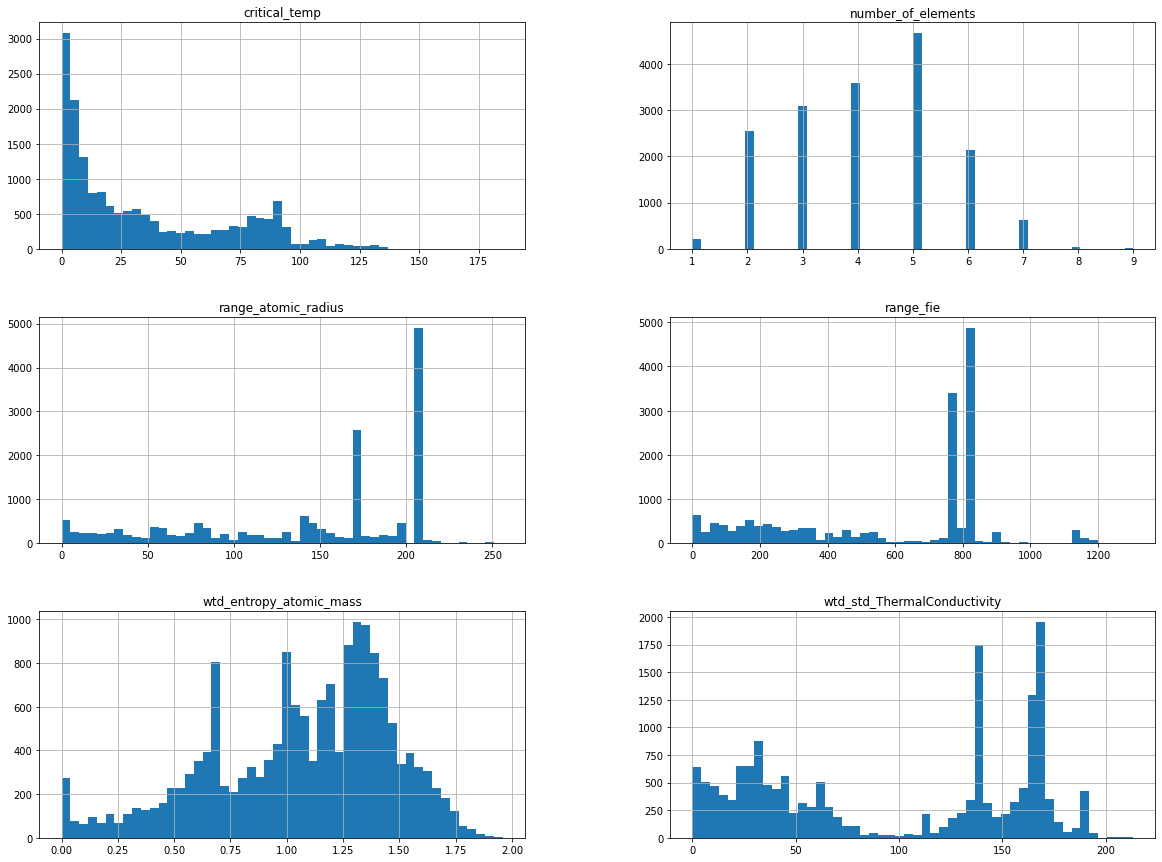

In [6]:
# thermal conductivity, atomic radius, valence, electron affinity, atomic mass
# Figure 1 in report. Plot showing the temperatures
top = ["critical_temp","wtd_std_ThermalConductivity","range_atomic_radius", "wtd_entropy_atomic_mass", "range_fie", "number_of_elements" ]
%matplotlib inline
import matplotlib.pyplot as plt 
train_set[top].hist(bins=50, figsize=(20,15)) 
plt.show()



## 2.3.1 Visualising and Analysing the Training Set (TODO)

To look for correlations, it would be worthy to plot scatterplots to see the relationship between the features and the critical temperature

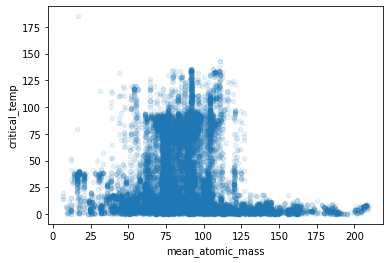

In [7]:
train_set.plot(kind='scatter', x='mean_atomic_mass', y='critical_temp', alpha=0.1)

No lets look at house this data relates to thermoconductivity

## 2.3.2 Looking for correlations (Todo)

Since the dataset is not too large, we can easily compute the standard correlation
coefficient (also called Pearson’s r) between every pair of attributes using the corr() method:

In [8]:
corr = train_set.corr()



top_features = ["critical_temp","wtd_std_ThermalConductivity", "range_atomic_radius", "wtd_entropy_atomic_mass", 
               "range_fie", "number_of_elements", "entropy_Valence" ]

bot_feat = corr['critical_temp'].sort_values(ascending = True).head(10)
bot = bot_feat.index.values

Interestingly, it is evident the thermalconductivity, atomic radius, valence and number elements highly correlate with critical temperature. Given this inoformation, lets plot a scatter matrix to visualise these correlations or a correlation matrix

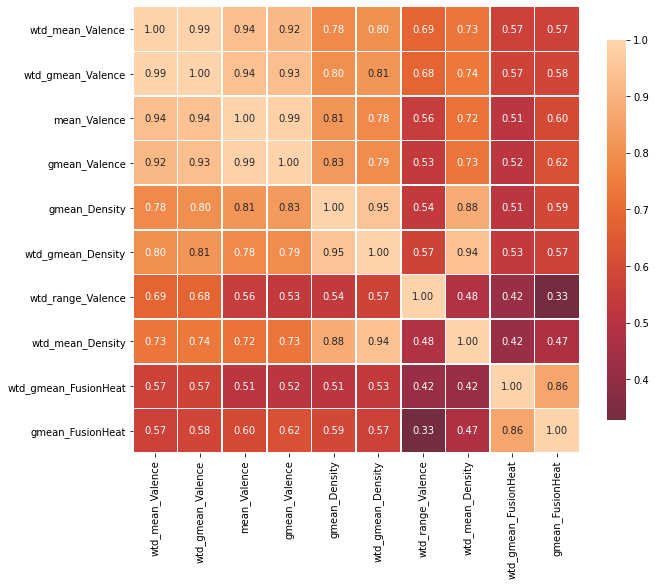

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16905 entries, 17226 to 15770
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   wtd_mean_Valence      16905 non-null  float64
 1   wtd_gmean_Valence     16905 non-null  float64
 2   mean_Valence          16905 non-null  float64
 3   gmean_Valence         16905 non-null  float64
 4   gmean_Density         16905 non-null  float64
 5   wtd_gmean_Density     16905 non-null  float64
 6   wtd_range_Valence     16905 non-null  float64
 7   wtd_mean_Density      16905 non-null  float64
 8   wtd_gmean_FusionHeat  16905 non-null  float64
 9   gmean_FusionHeat      16905 non-null  float64
dtypes: float64(10)
memory usage: 1.4 MB


In [9]:
most_corr = train_set[bot]


def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(most_corr)


most_corr.info()



In [10]:
top_features =["critical_temp","wtd_std_ThermalConductivity", "range_atomic_radius", "wtd_entropy_atomic_mass", 
               "range_fie", "number_of_elements", "entropy_Valence" ]
# scatter_matrix(train_set[top_features], figsize=(10,10))

As we can see from the figure above, the promising attribute to predict the critical temperature appears to be the wtd_std_ThermalConductivity, so let's zoom in on their correlation scatterplot 

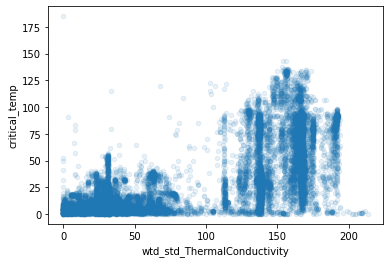

In [11]:
train_set.plot(kind="scatter", x="wtd_std_ThermalConductivity", y="critical_temp", alpha=0.1)

## 2.4 Selecting and Training The Model

The model that be used first is Linear Regression. This is because given the data set, we are trying to understanding the relationship between the 81 independant variables and the depedent variable - critical temperature. 

Linear Regression Performance:
RMSE = 17.77134245085791
R2 = 0.7318282728782987
Random Forest Performance:
RMSE = 20.053501673917552
R2 = 0.6585296853566203


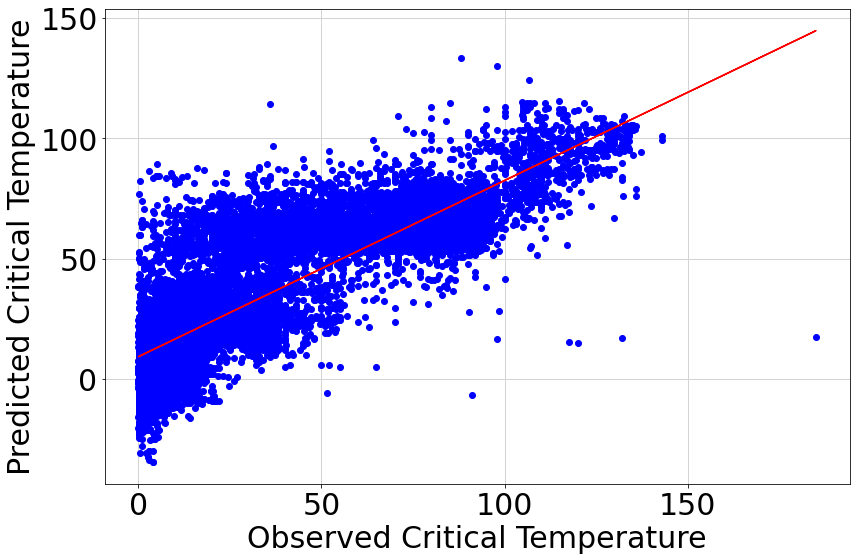

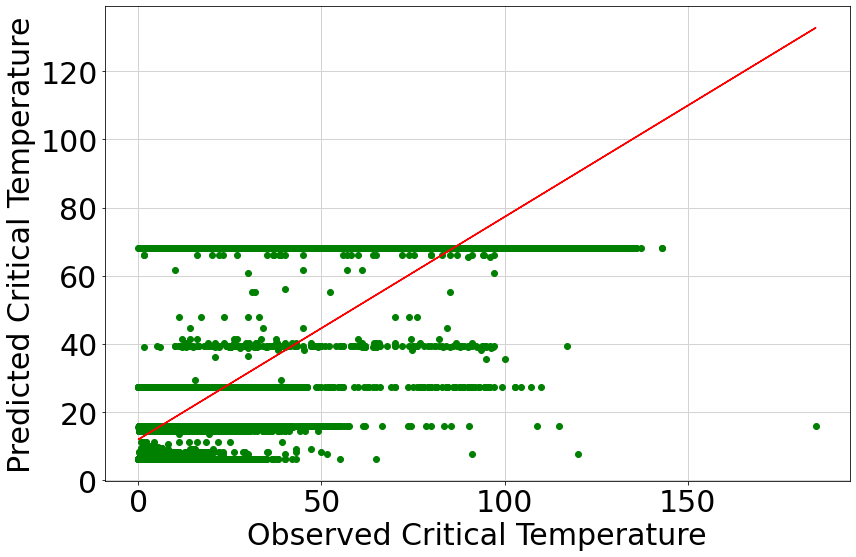

In [12]:
#Prepare the data for the model
X_train = train_set.iloc[:,0:80].to_numpy()
y_train = train_set.iloc[:,81].to_numpy()


def run_linreg_train(X,y):
    linreg = LinearRegression()
    linreg.fit(X,y)
    y_hat = linreg.predict(X)
    mse = mean_squared_error(y,y_hat)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_hat)
    print("Linear Regression Performance:\nRMSE = {0}\nR2 = {1}".format(rmse,r2))
    return y_hat

def run_forest_train(X,y):
    regr = RandomForestRegressor(max_depth=2, random_state=0)
    regr.fit(X,y)
    y_hat = regr.predict(X)
    lin_mse = mean_squared_error(y,y_hat)
    lin_rmse = np.sqrt(lin_mse)
    r2 = r2_score(y, y_hat)
    print("Random Forest Performance:\nRMSE = {0}\nR2 = {1}".format(lin_rmse,r2))
    return y_hat
    


y_hat_lin = run_linreg_train(X_train,y_train)
y_hat_forest = run_forest_train(X_train,y_train)



def plotModel(y, y_hat,c):
    # Create a dictionary to pass to matplotlib
    # These settings make the plots readable on slides, feel free to change
    # This is an easy way to set many parameters at once
    fontsize = "30";
    params = {'figure.autolayout':True,
              'legend.fontsize': fontsize,
              'figure.figsize': (12, 8),
             'axes.labelsize': fontsize,
             'axes.titlesize': fontsize,
             'xtick.labelsize':fontsize,
             'ytick.labelsize':fontsize}
    plt.rcParams.update(params)
    
    # Create a new figure and an axes objects for the subplot
    # We only have one plot here, but it's helpful to be consistent
    fig, ax = plt.subplots()
    
    # Draw a scatter plot of the first column of x vs second column.
    ax.scatter(y,y_hat, color = c)
    ax.set_xlabel("Observed Critical Temperature")
    ax.set_ylabel("Predicted Critical Temperature")
    ax.grid(color='lightgray', linestyle='-', linewidth=1)
    ax.set_axisbelow(True)
    
    m, b = np.polyfit(y, y_hat, 1)
    ax.plot(y, m*y + b, color='red')

lin_color = 'blue'
for_color = 'green'
plotModel(y_train,y_hat_lin,lin_color)
plotModel(y_train,y_hat_forest,for_color)



    

## Cross Validation


In [13]:
linreg = LinearRegression()
forreg = RandomForestRegressor(max_depth=2, random_state=0)

def cross_validate(reg):
    scores = cross_val_score(reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
    rmse_scores = np.sqrt(-scores)
    return rmse_scores

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
# lin_cross_scores = cross_validate(linreg)
# forrest_cross_scores = cross_validate(forreg)

# display_scores(lin_cross_scores)
# display_scores(forrest_cross_scores)

Scores: [17.7914924  18.15160386 18.02917206 17.92002689 17.3133569  18.01500929
 18.01778584 18.23597703 17.50968735 17.6119595 ]
Mean: 17.85960711171732
Standard deviation: 0.2820091631689002
Scores: [20.47601314 19.93523513 20.49689978 19.64221687 19.07497679 20.82799687
 19.739661   20.62211466 20.07388341 19.7372764 ]
Mean: 20.062627405771288
Standard deviation: 0.5135184003551477


## Fine Tuning the model



In [14]:
# # Plotting the learning curve
# def plot_learning_curves(model, X, y): 
#     X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
#     train_errors, val_errors = [], []
#     for m in range(1, len(X_train)):
#         model.fit(X_train[:m], y_train[:m])
#         y_train_predict = model.predict(X_train[:m])
#         y_val_predict = model.predict(X_val)
#         train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
#         val_errors.append(mean_squared_error(y_val, y_val_predict))
#     plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
#     plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

# def plot_val_curve(regr):
#     param_range = np.logspace(-6, -1, 5)
#     train_scores, test_scores = validation_curve(
#     linreg, X_train, y_train, param_name="normalize", param_range=param_range,
#     scoring="accuracy", n_jobs=1)
#     train_scores_mean = np.mean(train_scores, axis=1)
#     train_scores_std = np.std(train_scores, axis=1)
#     test_scores_mean = np.mean(test_scores, axis=1)
#     test_scores_std = np.std(test_scores, axis=1)

#     plt.title("Validation Curve with SVM")
#     plt.xlabel(r"$\gamma$")
#     plt.ylabel("Score")
#     plt.ylim(0.0, 1.1)
#     lw = 2
#     plt.semilogx(param_range, train_scores_mean, label="Training score",
#                  color="darkorange", lw=lw)
#     plt.fill_between(param_range, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.2,
#                      color="darkorange", lw=lw)
#     plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
#                  color="navy", lw=lw)
#     plt.fill_between(param_range, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.2,
#                      color="navy", lw=lw)
#     plt.legend(loc="best")
#     plt.show()


# plot_val_curve(linreg)

ValueError: continuous is not supported

In [ ]:
# ***************Grid Search Setup***************                                                                   
                                                                                                                    
# https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d
                                                                                                                    
# Implementing Grid Search to find the best learning rate and momentum                                              
param_grid_forrest = [ {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8], 'max_depth': [2, 5, 10,15]},]      


def grid_search_forest(param_grid):                                                                              
    """                                                                                                   
    Runs grid search and exports data into a csv                                                          
    :return:                                                                                              
    """""                                                                                                 
    grid_search_fit = GridSearchCV(estimator=forreg,                                                         
                                   param_grid=param_grid,                                                 
                                   scoring='neg_mean_squared_error', return_train_score=True,                                                   
                                   cv=5,                                                                 
                                   n_jobs=1)                                                              
    grid_search_fit = grid_search_fit.fit(X_train, y_train)                                               
    grid_csv = pd.DataFrame(grid_search_fit.cv_results_).to_csv('grid_search_results.csv')     
    

## Regularisation on Linear Model



In [20]:
# ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
param_grid_ridge= [{'alpha': [1, 0.5, 0.2, 0.3, 0.7, 2, 0.8, 5, 10] , 
                           'solver': ["cholesky", "sgd", "svd","lsqr","sparse_cg","sag", "saga"]}]
param_grid_lasso= [ {'alpha': [1, 0.5, 0.2, 0.3, 0.7, 2, 0.8, 5, 10]}]

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)



#lasso
lasso_reg = Lasso(alpha=0.1)


def grid_search_ridge(param_grid):                                                                              
    """                                                                                                   
    Runs grid search and exports data into a csv                                                          
    :return:                                                                                              
    """""                                                                                                 
    grid_search_fit = GridSearchCV(estimator=ridge_reg,                                                         
                                   param_grid=param_grid,                                                 
                                   scoring='neg_mean_squared_error', return_train_score=True,                                                   
                                   cv=5,                                                                 
                                   n_jobs=1)                                                              
    grid_search_fit = grid_search_fit.fit(scaled_X_train, y_train)                                               
    grid_csv = pd.DataFrame(grid_search_fit.cv_results_).to_csv('grid_search_results_ridge.csv')
    
def grid_search_lasso(param_grid):                                                                              
    """                                                                                                   
    Runs grid search and exports data into a csv                                                          
    :return:                                                                                              
    """""                                                                                                 
    grid_search_fit = GridSearchCV(estimator=lasso_reg,                                                         
                                   param_grid=param_grid,                                                 
                                   scoring='neg_mean_squared_error', return_train_score=True,                                                   
                                   cv=5,                                                                 
                                   n_jobs=1)                                                              
    grid_search_fit = grid_search_fit.fit(X_train, y_train)                                               
    grid_csv = pd.DataFrame(grid_search_fit.cv_results_).to_csv('grid_search_results_lasso.csv')
       
    
grid_search_ridge(param_grid_ridge)
grid_search_lasso(param_grid_lasso)



/cs/home/ybk1/Documents/Modules/CS5014/CS5014-P1/env/lib64/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'saga'. Got sgd.

  FitFailedWarning)
/cs/home/ybk1/Documents/Modules/CS5014/CS5014-P1/env/lib64/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'saga'. Got sgd.

  FitFailedWarning)
/cs/home/ybk1/Documents/Modules/CS5014/CS5014-P1/env/lib64/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details

/cs/home/ybk1/Documents/Modules/CS5014/CS5014-P1/env/lib64/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'saga'. Got sgd.

  FitFailedWarning)
/cs/home/ybk1/Documents/Modules/CS5014/CS5014-P1/env/lib64/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'saga'. Got sgd.

  FitFailedWarning)
/cs/home/ybk1/Documents/Modules/CS5014/CS5014-P1/env/lib64/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details

## Stacking

In [32]:
estimators = [
    ('Random Forest', RandomForestRegressor(max_features = 14, max_depth  = 10, n_estimators =10, random_state=0)),
    ('Linear Regression', LinearRegression()),
    ('Ridge', Ridge(alpha=0.2, solver="cholesky"))
]
stacking_regressor = StackingRegressor(
    estimators=estimators, final_estimator=RidgeCV()
)

In [29]:
def plot_regression_results(ax, y_true, y_pred, title, scores, elapsed_time):
    """Scatter plot of the predicted vs true targets."""
    ax.plot([y_true.min(), y_true.max()],
            [y_true.min(), y_true.max()],
            '--r', linewidth=2)
    ax.scatter(y_true, y_pred, alpha=0.2)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([y_true.min(), y_true.max()])
    ax.set_ylim([y_true.min(), y_true.max()])
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    extra = plt.Rectangle((0, 0), 0, 0, fc="w", fill=False,
                          edgecolor='none', linewidth=0)
    ax.legend([extra], [scores], loc='upper left')
    title = title + '\n Evaluation in {:.2f} seconds'.format(elapsed_time)
    ax.set_title(title)

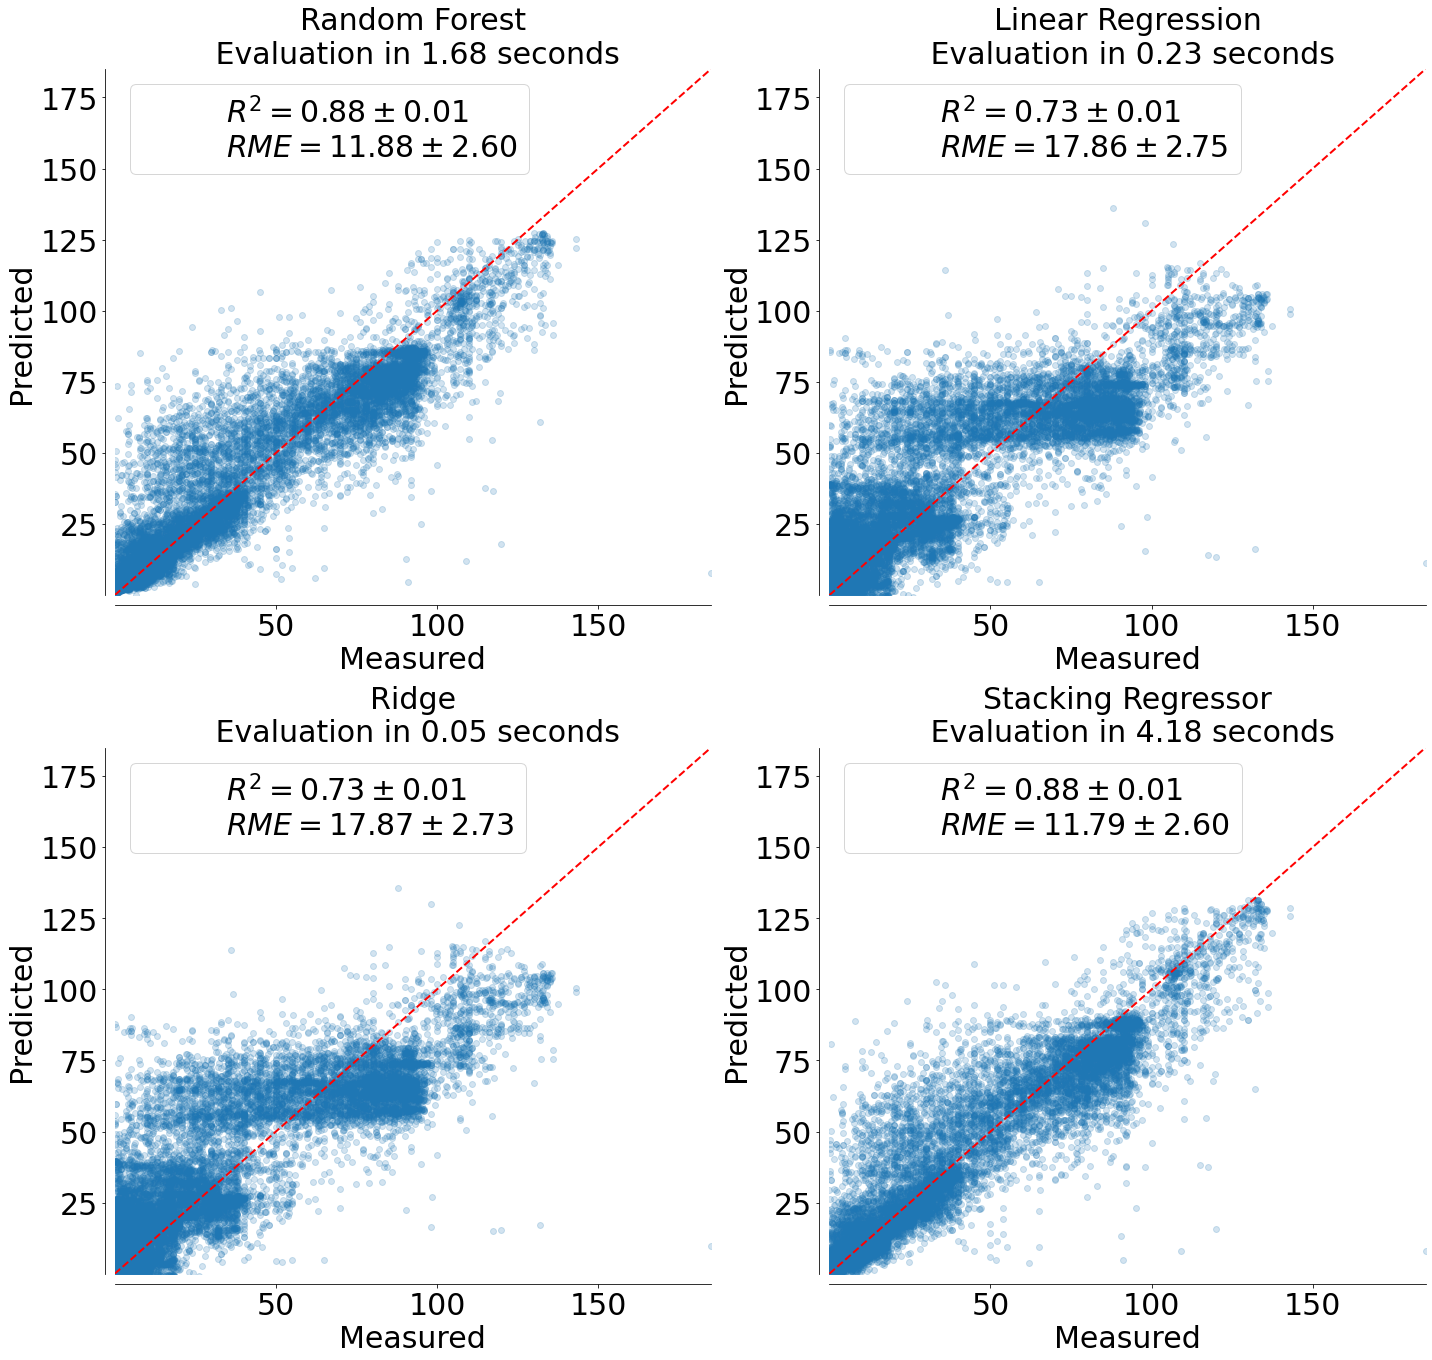

In [44]:
X = X_train
y = y_train

fig, axs = plt.subplots(2, 2, figsize=(20, 19))
axs = np.ravel(axs)

for ax, (name, est) in zip(axs, estimators + [('Stacking Regressor',
                                               stacking_regressor)]):
    start_time = time.time()
    score = cross_validate(est, X, y,
                           scoring=['r2', 'neg_mean_squared_error'],
                           n_jobs=-1, verbose=0)
    elapsed_time = time.time() - start_time

    y_pred = cross_val_predict(est, X, y, n_jobs=-1, verbose=0)
    joblib.dump(est, "my_model.pkl")
    plot_regression_results(
        ax, y, y_pred,
        name,
        (r'$R^2={:.2f} \pm {:.2f}$' + '\n' + r'$RME={:.2f} \pm {:.2f}$')
        .format(np.mean(score['test_r2']),
                np.std(score['test_r2']),
                np.sqrt(-np.mean(score['test_neg_mean_squared_error']) ),
                np.sqrt(np.std(score['test_neg_mean_squared_error']))),
        elapsed_time)


plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

### Evaluating on the test set



Final Model Performance:
RMSE = 10.808492278658434
R2 = 0.9002073159406438


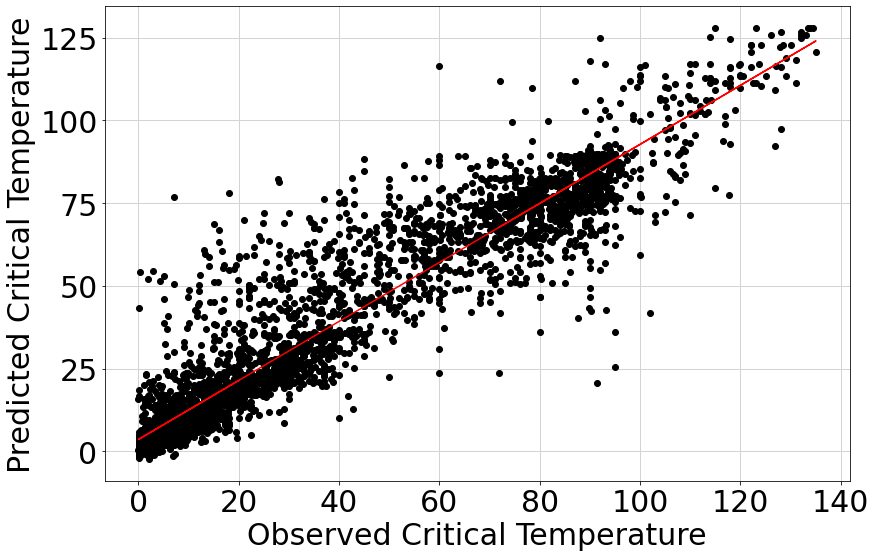

In [54]:
final_model= joblib.load("final_model.pkl")
X_test = test_set.iloc[:,0:80].to_numpy()
y_test = test_set.iloc[:,81].to_numpy()

def run_final_model(X,y, model):
    model.fit(X_train,y_train)
    y_hat = model.predict(X)
    mse = mean_squared_error(y,y_hat)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_hat)
    print("Final Model Performance:\nRMSE = {0}\nR2 = {1}".format(rmse,r2))
    return y_hat

color = "black"
y_hat_final_model = run_final_model(X_test,y_test, final_model)
plotModel(y_test,y_hat_final_model,color)